In [50]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
brst_df = pd.read_csv('C:/Users/KIIT/Programs/Projects/Content/breast.csv')
brst_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [52]:
brst_df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [53]:
brst_df = brst_df.dropna(axis=1)

In [54]:
brst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [55]:
brst_df['diagnosis'].value_counts()

diagnosis
1    357
0    212
Name: count, dtype: int64

In [57]:
brst_df.groupby('diagnosis').mean()  #to find avg wrt target

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
diagnosis,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898
1,12.146524,17.914762,78.075406,462.790196,0.092478


In [58]:
corr = brst_df.corr()#correleation function to show correleation to find best dependecy
corr

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

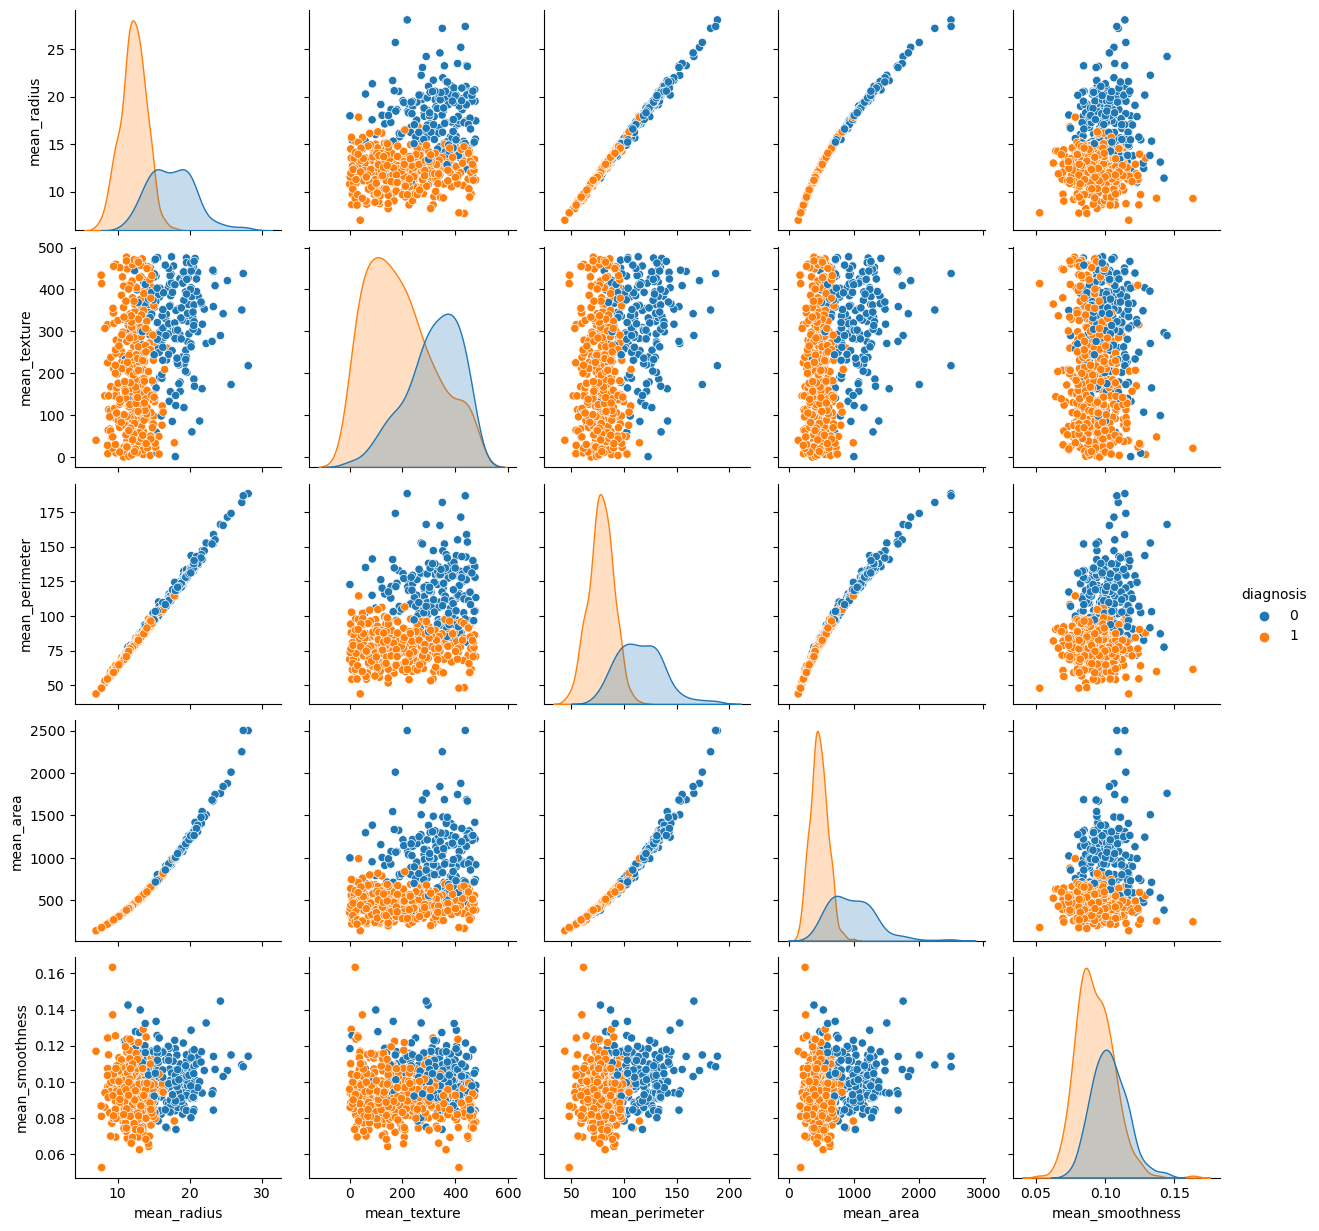

In [60]:
sns.pairplot(brst_df, hue="diagnosis")

In [61]:
brst_df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,1.0,122.80,1001.0,0.11840,0
1,20.57,186.0,132.90,1326.0,0.08474,0
2,19.69,324.0,130.00,1203.0,0.10960,0
3,11.42,297.0,77.58,386.1,0.14250,0
4,20.29,60.0,135.10,1297.0,0.10030,0


<Axes: >

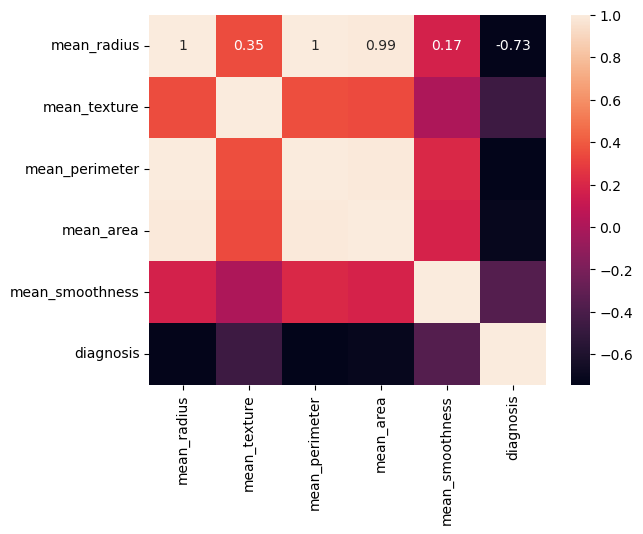

In [64]:
sns.heatmap(brst_df.corr(), annot=True)

In [66]:
x= brst_df.drop(columns= 'diagnosis',axis=1)# all fearures
y= brst_df['diagnosis']#labels
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,1.0,122.80,1001.0,0.11840
1,20.57,186.0,132.90,1326.0,0.08474
2,19.69,324.0,130.00,1203.0,0.10960
3,11.42,297.0,77.58,386.1,0.14250
4,20.29,60.0,135.10,1297.0,0.10030


In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

In [70]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [74]:
#Using KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [76]:
from sklearn.metrics import accuracy_score
x_train_prediction = classifier.predict(x_train)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
training_data_accuracy

0.9230769230769231

In [77]:
x_test_prediction = classifier.predict(x_test)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_test_prediction,y_test)
training_data_accuracy

0.9385964912280702

In [78]:
input_data = (18, 20.5, 140.7, 795, 0.1234)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You donot have breast cancer'
else:
    message = 'You have breast cancer, Please contact a doctor'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[1.800e+01 2.050e+01 1.407e+02 7.950e+02 1.234e-01]
[[1.800e+01 2.050e+01 1.407e+02 7.950e+02 1.234e-01]]
[0]
Input Features:  (18, 20.5, 140.7, 795, 0.1234)
Prediction:  [0]
Prediction Message:  Nothing to worry, You donot have breast cancer
